# Лабораторная работа №2
## Решение краевых задач. Методы коллокаций, наименьших квадратов и Галеркина
### Вариант 19
*Задание.* Методами коллакаций, интегральным и дискретным методами наименьших квадратов и Галеркина получить численное решение краевой задачи.

- $y''+(1+x^2)y=-1,   -1\le x\le 1,    y(-1)=y(1)=0$

- $ay''+(1+bx^2)y=-1,    -1\le x\le 1,   y(-1)=y(1)=0, a=sin(19), b=cos(19)$

Базисную систему выбрать в виде:

$\phi_i(x)=x^i(1-x^2), i=0,1,2,...$

#### Метод коллокаций

In [589]:
# importing necessary libraries

import numpy as np
import scipy as sp
from scipy.misc import derivative 
from scipy import sparse
from scipy import integrate
import matplotlib.pyplot as plt

In [706]:
# variant number and initial conditions

K = 19
a = -1
b = 1
n = 100

In [556]:
# базисная функция и ее первая и вторая производные

def basic_func(x, i, deriv=0):
    if deriv == 0:
        return x**i * (1 - x * x)
    elif deriv == 1:
        return x**(i - 1) * (i - x * (i + 1))
    elif deriv == 2:
        if i == 0:
            return -2
        elif i == 1:
            return -6. * x
        elif i == 2:
            return 2 - 12*x*x
        return x**(i-2) * ((i*i-i) - x*x * (i+1) * (i+2))

6.0

In [557]:
# получаем список значений базисных функций (или ее производных) в точке "х"

def linear_comb(x, n, deriv=0):
    res = []
    for i in range(0, n):
        res.append(basic_func(x, i, deriv))
    return res

In [571]:
def q(x, b=1.):
    return 1. + b * x * x

In [572]:
# коэффициенты при А(i)
def psi(x, n, f, a=1.):
    res = a * np.array(linear_comb(x, n, 2))
    res += np.array(linear_comb(x, n, 0)) * f(x)
    return res

In [573]:
# точки коллокации

X = np.linspace(a, b, n)

In [574]:
M = [psi(i, n, q) for i in X]

In [575]:
A = np.linalg.solve(M, np.array([-1] * (n)))

In [576]:
solution = []
for x in X:
    s = 0
    for k, item in enumerate(A):
        s += item * basic_func(x, k)
    solution.append(s)

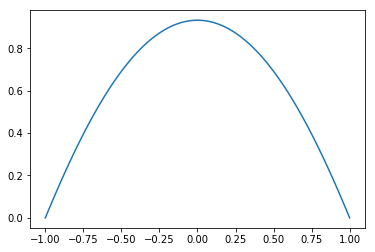

In [577]:
plt.plot(X, solution)

In [711]:
# второе уравнение

M2 = [psi(i, n, lambda x: 1 + np.cos(K)*x*x, a=np.sin(K)) for i in X]

In [712]:
A2 = np.linalg.solve(M2, np.array([-1] * n))

In [713]:
solution2 = []
for x in X:
    s = 0
    for k, item in enumerate(A2):
        s += item * basic_func(x, k)
    solution2.append(s)

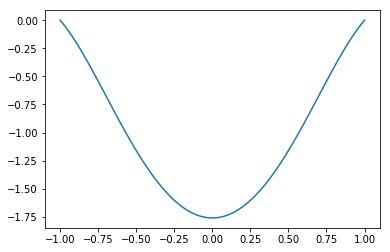

In [714]:
plt.plot(X, solution2)

#### Интегральный метод наименьших квадратов

In [715]:
n=20
M = [[integrate.quad(
    lambda x:
    (basic_func(x, j, 2) + q(x)*basic_func(x, j, 0))*\
    (basic_func(x, i, 2) + q(x)*basic_func(x, i, 0)), a, b)[0]
      for j in range(n)] for i in range(n)]
print(len(M))

20


In [716]:
B = [integrate.quad(lambda x: -1 * ( basic_func(x, i, 2) + q(x)*basic_func(x, i, 0)), a, b)[0] 
      for i in range(n) ]
len(B)

20

In [717]:
A = np.linalg.solve(M, B)

In [718]:
solution = []
for x in X:
    s = 0
    for k, item in enumerate(A):
        s += item * basic_func(x, k)
    solution.append(s)

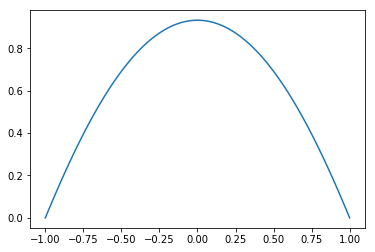

In [719]:
plt.plot(X, solution)

In [735]:
# второе уравнение

M2 = [[integrate.quad(
    lambda x:
    (np.sin(K)*basic_func(x, j, 2) + q(x, np.cos(K))*basic_func(x, j, 0))*\
    (np.sin(K)*basic_func(x, i, 2) + q(x, np.cos(K))*basic_func(x, i, 0)), a, b)[0]
      for j in range(n)] for i in range(n)]

In [736]:
B2 = [integrate.quad(lambda x: -1 * (np.sin(K)* basic_func(x, i, 2) + q(x, np.cos(K))*basic_func(x, i, 0)), a, b)[0] 
      for i in range(n) ]

In [737]:
A2 = np.linalg.solve(M2, B2)

In [738]:
solution2 =  []
for x in X:
    s = 0
    for k, item in enumerate(A2):
        s += item * basic_func(x, k)
    solution2.append(s)

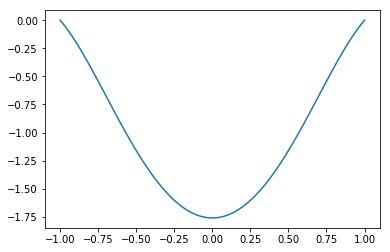

In [739]:
plt.plot(X, solution2)

#### Дискретный метод наименьших квадратов

In [909]:
n = 100
N = 4 * n
XN = np.linspace(a, b, N)
M = [[0. for i in range(n)] for j in range(n)]

help_matrix = [[(basic_func(x, i, 2) + q(x)*basic_func(x, i, 0)) for x in XN] for i in range(n)]


In [910]:

ind1, ind2, ind3 = 0, 0, 0
while ind1 < n:
    ind2 = 0
    while ind2 <= ind1:
        ind3 = 0
        while ind3 < N:
            M[ind1][ind2] += help_matrix[ind2][ind3]*help_matrix[ind1][ind3]
            ind3 += 1
        
        ind2 += 1
    ind1 += 1


for i in range(n):
    for j in range(n):
        M[i][j] = M[j][i]

In [888]:
B = []
for i in range(n):
    s = 0
    for x in XN:
        s += -1 * ( basic_func(x, i, 2) + q(x)*basic_func(x, i, 0))
    B.append(s)

In [889]:
A = np.linalg.solve(M, B)

In [890]:
solution = []
for x in X:
    s = 0
    for k, item in enumerate(A):
        s += item * basic_func(x, k)
    solution.append(s)

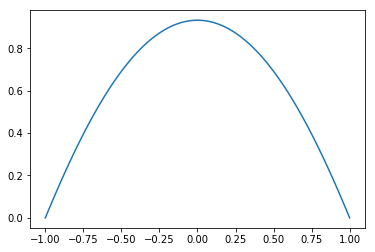

In [891]:
plt.plot(X, solution)

In [924]:
# второе уравнение

M2 = [[0. for i in range(n)] for j in range(n)]

help_matrix2 = [[(np.sin(K)*basic_func(x, i, 2) + q(x, np.cos(K))*basic_func(x, i, 0)) for x in XN] for i in range(n)]


In [930]:
%%time
ind1, ind2, ind3 = 0, 0, 0
while ind1 < n:
    ind2 = 0
    while ind2 <= ind1:
        ind3 = 0
        while ind3 < N:
            M2[ind1][ind2] += help_matrix2[ind2][ind3]*help_matrix2[ind1][ind3]
            ind3 += 1
        
        ind2 += 1
    ind1 += 1


for i in range(n):
    for j in range(n):
        M2[i][j] = M2[j][i]

Wall time: 1.04 s


In [926]:
B2 = []
for i in range(n):
    s = 0
    for x in XN:
        s += -1 * (np.sin(K)* basic_func(x, i, 2) + q(x, np.cos(K))*basic_func(x, i, 0))
    B2.append(s)

In [927]:
A2 = np.linalg.solve(M2, B2)

In [928]:
solution2 = []
for x in X:
    s = 0
    for k, item in enumerate(A2):
        s += item * basic_func(x, k)
    solution2.append(s)

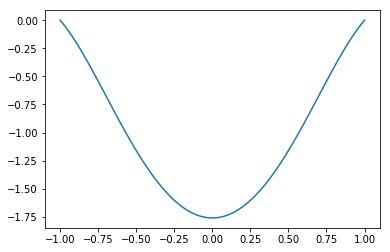

In [929]:
plt.plot(X, solution2)

#### Метод Галеркина